## Eksplorasi dan Analisis Data COVID-19 Indonesia using Python
Kita akan memahami pemanfaatan keterbukaan data publik dan teknik analisis data untuk memahami dinamika pandemi COVID-19. kita akan mempelajari:

    Memahami prinsip dasar mengenai API
    Mengimpor data real-time menggunakan API
    Mampu melakukan proses data cleaning dan transformasi sederhana
    Mengenal fungsi-fungsi unik dari beberapa paket di tidyverse
    Mampu membuat visualisasi data yang informatif, elegan, dan straightforward
    Mengambil kesimpulan atas hasil analisis data
    Mengadaptasi proses analisis data untuk studi kasus berbeda

### Latar Belakang Project

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

Dalam proyek ini, kita akan melakukan eksplorasi dan analisis mengenai COVID-19 di Indonesia. Data yang akan kita pergunakan diambil langsung dari API (Application Programming Interface) yang tersedia di covid19.go.id. Sehingga dalam proyek ini kita akan mempelajari teknik mengambil data dari API, teknik mempersiapkan data, serta analisis dan visualisasi data.

### Mengakses API covid19.go.id

Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.

Salah satu cara untuk mengakses API adalah dengan menggunakan fungsi get() dari library requests.
Untuk menggunakan library tersebut kita harus menginstall nya terlebih dahulu.

In [1]:
# !pip install requests

# https://docs.python-requests.org/en/latest/

In [2]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

### Mengevaluasi Respon

Saat kita menjalankan fungsi get(), pada dasarnya hal yang terjadi adalah kita membuat sebuah request atau permintaan kepada server penyedia API. Permintaan tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. Objek resp yang telah kita deklarasikan memiliki informasi respon oleh server.

Ada tiga informasi utama dalam sebuah respon API, yaitu status, headers, dan body. Status memiliki informasi apakah permintaan berhasil atau tidak dan dinyatakan dalam status code, headers umumnya mengandung informasi metadata, sedangkan body berisikan konten atas permintaan yang telah dibuat.

### Status Code

Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

       200 Artinya permintaan sukses dipenuhi.
       300 Artinya berkas yang diminta tidak dapat ditemukan.
       400 Artinya akses permintaan ditolak.
       500 Artinya terjadi kesalahan pada server.

Informasi lengkap mengenai jenis-jenis status code dapat kita pelajari di https://restfulapi.net/http-status-codes/

In [3]:
print(resp)

# status code 200 yang artinya berhasil melakukan request ke server

<Response [200]>


### Headers API

Status permintaan kita melalui API sukses dipenuhi!
Sekarang kita jalankan attribut headers pada resp untuk mengetahui metadata apa saja yang tersimpan. Tampilkan dengan menggunakan fungsi print()

Apakah isi dari elemen content-type?

Kapan terakhir kali informasi diperbaharui?

In [4]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Mon, 16 May 2022 14:03:57 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Mon, 16 May 2022 13:59:18 GMT', 'ETag': 'W/"628258b6-4c55a"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


### Mengekstrak Isi Respon

Respon API dengan status code 200 menyatakan bahwa permintaan kita berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. Selain itu kita juga telah mengetahui lewat attribut headers bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.

Selanjutnya kita dapat mengekstrak konten tersebut dengan menggunakan method json(). Method json() merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON. Jalankan method json() pada obyek resp dan simpanlah hasilnya sebagai cov_id_raw!

cov_id_raw ini bertipe data dictionary

In [5]:
cov_id_raw = resp.json()

Dengan menggunakan fungsi len() dan keys() cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut!
Kemudian ekstraklah key ke-2 dan simpan dengan nama cov_id_update.

In [6]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


### Analisa Data

Sekarang kita akan fokus pada obyek cov_id_update untuk menjawab dapat pertanyaan-pertanyaan berikut:

    Kapan tanggal pembaharuan data penambahan kasus?
    Berapa jumlah penambahan kasus sembuh?
    Berapa jumlah penambahan kasus meninggal?
    Berapa jumlah total kasus positif hingga saat ini?
    Berapa jumlah total kasus meninggal hingga saat ini?


In [7]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2022-05-16
Jumlah penambahan kasus sembuh : 263
Jumlah penambahan kasus meninggal : 6
Jumlah total kasus positif hingga saat ini : 6050958
Jumlah total kasus meninggal hingga saat ini: 156464


## Apa Kabar Jawa Barat?

Kita telah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. Namun bagaimana jika kita ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json.

In [8]:
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

### Memahami Kasus COVID-19 di Jawa Barat

Sekarang kita jalankan method keys() pada cov_jabar_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

    Berapa jumlah total kasus COVID-19 di Jawa Barat?
    Berapa persentase kematian akibat COVID-19 di Jawa Barat?
    Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?


In [9]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat : 1105949
Persentase kematian akibat COVID-19 di Jawa Barat : 1.427100.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.462226.2%


### Memperoleh Informasi yang Lebih Lengkap

Informasi umum mengenai COVID-19 di Jawa Barat telah kita dapatkan. Namun informasi akan lebih lengkap jika kita memiliki data perkembangan COVID-19 dari waktu ke waktu.

Informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah kita buat sebelumnya. Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan.
Ekstrak data tersebut dari cov_jabar_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe.
Kemudian simpanlah hasilnya sebagai obyek bernama cov_jabar!
Amati struktur cov_jabar menggunakan method info() dan head().

In [10]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

In [11]:
import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:')
cov_jabar.info()
print('\nLima data teratas cov_jabar:')
cov_jabar.head()

Info cov_jabar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       802 non-null    int64
 1   KASUS                         802 non-null    int64
 2   MENINGGAL                     802 non-null    int64
 3   SEMBUH                        802 non-null    int64
 4   DIRAWAT_OR_ISOLASI            802 non-null    int64
 5   AKUMULASI_KASUS               802 non-null    int64
 6   AKUMULASI_SEMBUH              802 non-null    int64
 7   AKUMULASI_MENINGGAL           802 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  802 non-null    int64
dtypes: int64(9)
memory usage: 56.5 KB

Lima data teratas cov_jabar:


,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583193600000,1,1,0,0,1,0,1,0
1,1583280000000,1,0,0,1,2,0,1,1
2,1583366400000,1,0,0,1,3,0,1,2
3,1583452800000,1,0,0,1,4,0,1,3
4,1583539200000,0,0,0,0,4,0,1,3


### Preprocessing Data

Setelah mengekstrak dan mengamati cov_jabar, kita menemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang kita akan mencoba melakukan beberapa tahapan untuk preprocessing data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Beberapa tahapan yang akan kita lakukan untuk preprocessing data cov_jabar, yaitu:

    Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
    Merubah format penulisan semua kolom menjadi huruf kecil
    Mengganti nama kolom kasus menjadi kasus_baru
    Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

Lengkapilah baris kode berikut untuk melakukan preprocessing data sesuai dengan tahapan yang telah Anda rencanakan! Anda akan menggunakan teknik chaining pada dataframe. Simpan hasil pengolahan Anda dengan nama cov_jabar_tidy.

In [12]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
if item.startswith('AKUMULASI')
or item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('20 data teratas:')
cov_jabar_tidy.head(20)

20 data teratas:


,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-03,1,1,0
1,2020-03-04,1,0,0
2,2020-03-05,1,0,0
3,2020-03-06,1,0,0
4,2020-03-07,0,0,0
5,2020-03-08,0,0,0
6,2020-03-09,0,0,0
7,2020-03-10,0,0,0
8,2020-03-11,0,1,0
9,2020-03-12,1,0,0


### Data Visualization

Kita berhasil preprocessing data cov_jabar menjadi cov_jabar_tidy sehingga lebih mudah untuk diolah.

Kemudian kita mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. kita akan memulai merancang visualisasi yang memiliki estetika dengan menggunakan library matplotlib.
Imporlah library tersebut sebagai aliasnya!

komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter()), line-chart memerlukan geometri garis (.plot()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (.bar()).

<Figure size 432x288 with 0 Axes>

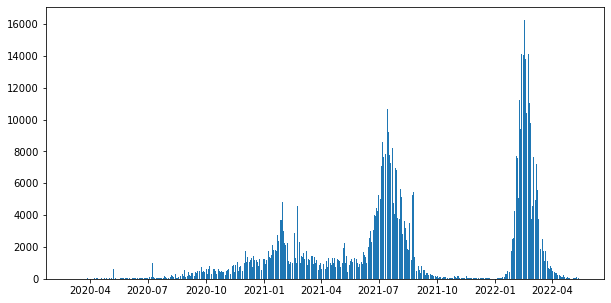

In [13]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

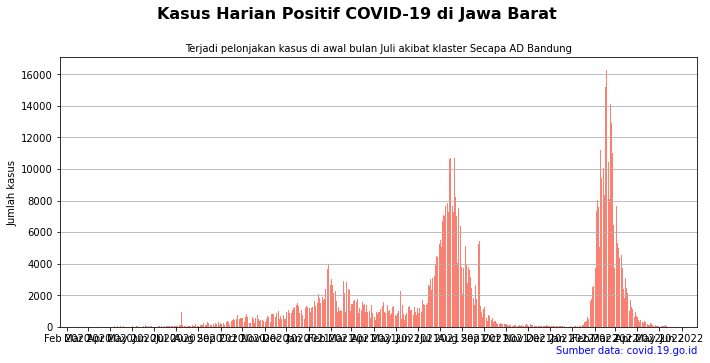

In [14]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Grafik untuk Kasus Sembuh

Sekarang buatlah grafik serupa dengan menggunakan data kasus sembuh menggunakan warna olivedrab!

<Figure size 432x288 with 0 Axes>

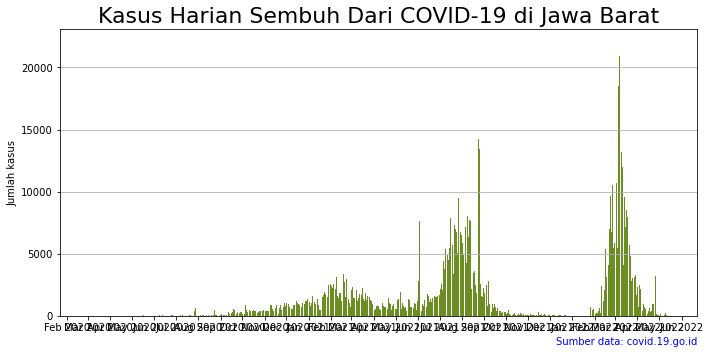

In [15]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Grafik untuk Kasus Meninggal

Sekarang buatlah grafik serupa dengan menggunakan data kasus meninggal menggunakan warna slategrey!

<Figure size 432x288 with 0 Axes>

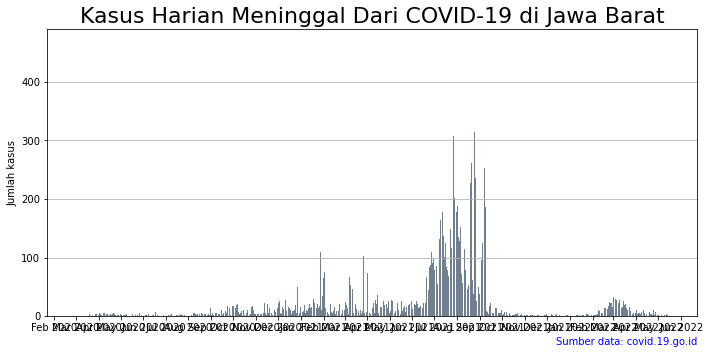

In [16]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Apakah Pekan ini Lebih Baik?

Setelah mengamati grafik perkembangan kasus kita menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

Kita dapat dengan mudah mengerjakannya kita sudah dibantu melalui predefined code, yaitu set terlebih dahulu kolom tanggal pada cov_jabar_tidy sebagai index. Kemudian terapkan method pada time series di pandas, resampling per pekan dan gunakan agregasi penjumlahan. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah weekofyear dan year untuk tahun.

In [24]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
.resample('W')
.sum()
.reset_index()
.rename(columns={'kasus_baru': 'jumlah'})
)
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
cov_jabar_pekanan.info()

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     115 non-null    int64
 1   pekan_ke  115 non-null    int64
 2   jumlah    115 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB


In [25]:
print('\nLima data teratas cov_jabar_pekanan:')
cov_jabar_pekanan.head()


Lima data teratas cov_jabar_pekanan:


,tahun,pekan_ke,jumlah
0,2020,10,4
1,2020,11,5
2,2020,12,44
3,2020,13,80
4,2020,14,89


### Menjawab Pertanyaan

Pertanyaan baru muncul di benak kita setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

Demi menjawab hal tersebut kita melakukan kalkulasi sederhana dengan tahapan berikut:

Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama jumlah_pekanlalu.
Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0

Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

In [26]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:')
cov_jabar_pekanan.head(10)

Sepuluh data teratas:


/tmp/ipykernel_12038/3995536804.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


,tahun,pekan_ke,jumlah,jumlah_pekanlalu,lebih_baik
0,2020,10,4,0,False
1,2020,11,5,4,False
2,2020,12,44,5,False
3,2020,13,80,44,False
4,2020,14,89,80,False
5,2020,15,176,89,False
6,2020,16,203,176,False
7,2020,17,136,203,True
8,2020,18,100,136,True
9,2020,19,914,100,False


### Membuat Bar Chart

Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

<Figure size 432x288 with 0 Axes>

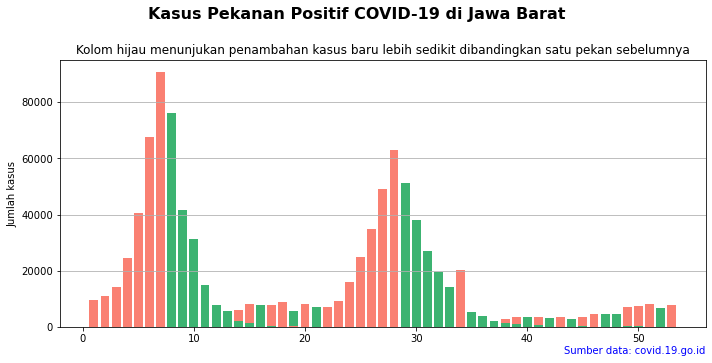

In [27]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Pola dan Dinamika

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain di diri kita: "Hingga saat ini ada berapa kasus yang masih aktif?"

Aktif dalam artian sedang dalam perawatan atau isolasi.

Informasi ini sebenarnya telah disediakan di dalam respon API covid19.go.id yang Anda minta. Namun tidak ada salahnya jika kita mencoba menghitungnya sendiri.

Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal. Kita dapat menggunakan method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik.

In [28]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
797,2022-05-09,1593,1088303,15773
798,2022-05-10,1464,1088525,15778
799,2022-05-11,1468,1088585,15778
800,2022-05-12,1455,1088649,15781
801,2022-05-13,1492,1088675,15782


### Membuat Line Chart

Sekarang kita akan membuat line-chart pola kasus aktif dengan menggunakan method plot pada ax

<Figure size 432x288 with 0 Axes>

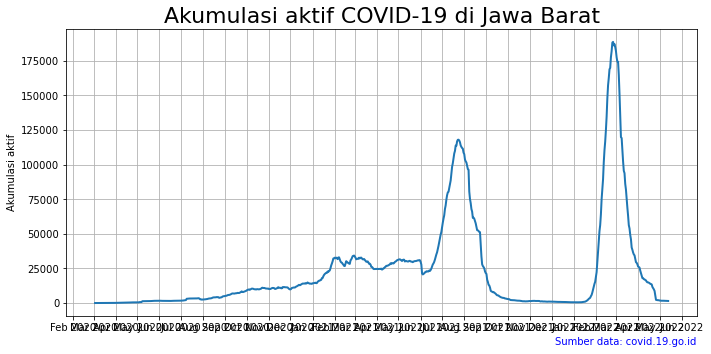

In [22]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

### Kabar Buruk dan Kabar Baik

Sebagai penutup analisis dalam proyek ini kita akan membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

Ada dua pilihan cara yang dapat Anda tempuh untuk membuat grafik tersebut:

    Menggunakan data frame cov_jabar_akumulasi, kemudian langsung melakukan line plot dan memilih warna garis yang sesuai untuk membedakan; atau
    Menggunakan ax.plot() dan mengisikan kolom-kolom yang masing-masingnya menjadi x dan y dengan data=cov_jabar_akumulasi, dan kemudian menset warna berbeda untuk ketiga line plot.


<Figure size 432x288 with 0 Axes>

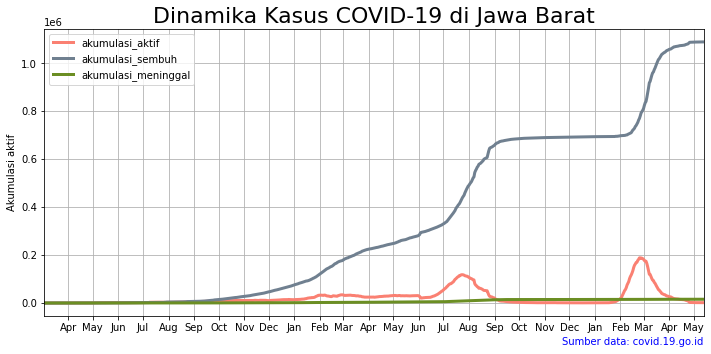

In [23]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()

## Kesimpulan & Penutup

Selamat kita telah menyelesaikan proyek analisis COVID-19 ini!
Kita telah berhasil melakukan impor data melalui API, melakukan transformasi data, serta membuat visualisasi untuk mengkomunikasikan hasil analisis data tentang COVID-19. Kita dipersilakan untuk selanjutnya mengembangkan analisis dengan cara mengambil studi kasus provinsi lain atau bahkan melakukan komparasi antar provinsi.